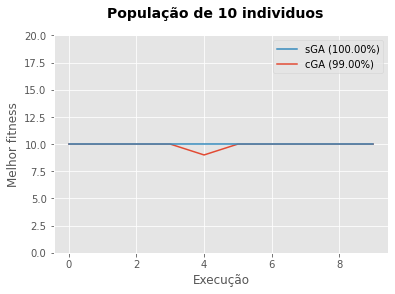

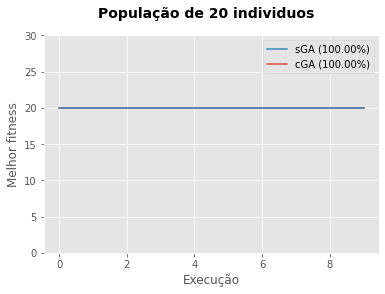

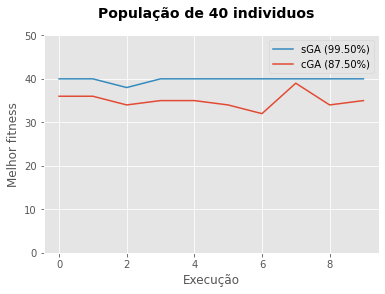

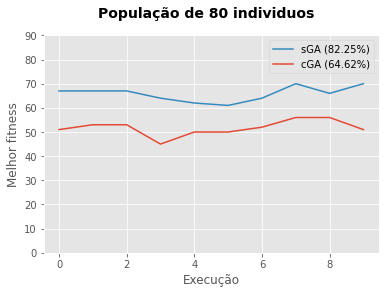

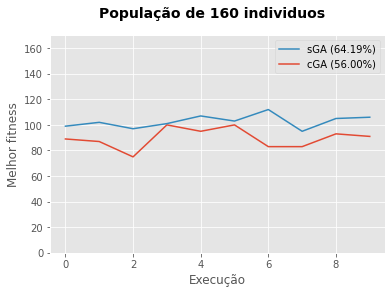

In [2]:
## ALGORITMO GENETICO COMPACTO POP COMPLETO e SIMPLES BINARIO COMPARACAO EXECUÇÂO
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

###################         SGA        ###################

# geração da população
def generate_pop_sga(size,population_size):
    sga_vector_pop = []

    for ps in range(population_size):
      sga_value = ''
      for s in range(size):
        sga_value += '1' if random.random() > 0.5  else '0'
      sga_vector_pop.append( {'val':sga_value,'fit':0} )

    return sga_vector_pop

# cruzamento dos individuos
def crossover_sga(size,population,mutation):
    son = population[0].copy()
    son2 = population[1].copy()

    s = son['val']
    s2 = son2['val']
    middle = random.randrange(1,size-1)
    
    son['fit'] = 0
    son2['fit'] = 0
    son['val'] = s[:middle] + s2[middle:]
    son2['val'] = s2[:middle] + s[middle:]
  
    # mutation
    child = son['val']
    child2 = son2['val']
    
    c1 = ""
    for c in child:
      mut = random.random()
      if(mut < mutation):
        c1+='1' if c == '0' else '0'
      else:
        c1+=c
    son['val'] = c1

    c2 = ""
    for s in child2:
      mut = random.random()
      if(mut < mutation):
        c2+='1' if s == '0' else '0'
      else:
        c2+=s
    son2['val'] = c2
   
    return son,son2

# verificação apenas da quantidade de bits 1
def to_Int(individuo):
  l = []
  for i in individuo:
    if i == "1":
      l.append(1)
    else:
      l.append(0)
  return sum(l)

# execução do algoritmo
def run_sga(generations, size, population_size):
    # criação da população aleatoria
    population = generate_pop_sga(size,population_size)
    population = fitness_function_sga(population)

    mutation = 0.01

    # percorre as gerações
    for i in range(generations):

      mid = int(population_size/2) if int(population_size/2) % 2 == 0 else int(population_size/2)-1
      new_population = []
      
      for j in range(0,mid,2):
        new_population += crossover_sga(size,population[j:j+2],mutation)
        
      full_pop = population + new_population
      full_pop = fitness_function_sga(full_pop)

      population = full_pop[:population_size]
      
      #print ("generation: {} and population {}".format(i + 1,population))
    p = population[0]
    return to_Int(p['val'])

# ordenação dos individuos
def sort_fit(e):
  return e['fit']

# funcao de fitness
def fitness_function_sga(population):
  vector_fit = []

  for p in population:
    p['fit']= int(p['val'],2) 
    vector_fit.append(p)

  vector_fit.sort(reverse = True,key=sort_fit)
  return vector_fit

###################          CGA        ###################

# estrutura do algoritmo do cga
class Solution(object):
    def __init__(self, value):
        self.value = value
        self.fitness = 0

    def calculate_fitness(self):
        self.fitness = fitness_function(self.value)

# criação dos individuos
def generate_candidate(vector,population_size):
    pop=[]
    for n in range(population_size):
      value = ''
      for q in vector:
        value += "1" if random.random() < q else "0"
      pop.append(value)
    
    return Solution(pop)

# criação do vetor de probabilidades
def generate_vector(size):
    return [0.5] * size

# competição dos fitness
def compete(a, b, a1, b1):
    if a > b:
        return a1, b1
    else:
        return b1, a1

# competição que percorre os individuos
def competition(population):
    for n in range(1,len(population.value)):
      winner,loser = compete(population.fitness[0],population.fitness[n],population.value[0],population.value[n])
    
    return winner, loser

# atualiza o vetor de probabilidade
def update_vector(vector, winner, loser, population_size):
    for i in range(len(vector)):
        if winner[i] != loser[i]:
            if winner[i] == '1':
                vector[i] += 1.0 / float(population_size)
            else:
                vector[i] -= 1.0 / float(population_size)

# execução do algoritmo
def run_cga(generations, size, population_size):
    # probabilidade do vetor
    vector = generate_vector(size)
    best = None
    for i in range(generations):
      population = generate_candidate(vector, population_size)
      population.calculate_fitness()
      winner, loser = competition(population)
      
      # verifica qual é o melhor
      if best:
          if int(winner,2) > int(best,2):
             best = winner
      else:
          best = winner
      
      update_vector(vector,winner,loser,population_size)
      
      #print ("generation: {} best value: {} best fitness: {}".format(i + 1, best, int(best,2) ) )
      
    p = to_Int(best)
    return p

# função fitness do cga
def fitness_function(value):
  value.sort(reverse=True)

  fit =[]
  for n in value:
    fit.append(int(n,2))

  return fit

# verificação da quantidade de execução(tests) e individuos(ind)
tests = 10
ind = [10,20,40,80,160]

# função que mostra o gráfico
def plotgraphics(progress_cga,progress_sga,pop_size):
  cga_accuracy = 0.0
  for c in progress_cga:
    cga_accuracy += c / pop_size
  cga_accuracy /= tests

  sga_accuracy = 0.0
  for s in progress_sga:
    sga_accuracy += s / pop_size
  sga_accuracy /= tests

  # Plot
  fig = plt.figure()
  fig.suptitle('População de ' + str(pop_size) + ' individuos',
     fontsize=14, fontweight='bold')
  line_cga, = plt.plot(progress_cga)
  line_sga, = plt.plot(progress_sga)
  plt.ylim(0, pop_size+10)
  plt.legend([line_sga, line_cga],
    ['sGA ({:.2f}%)'.format(sga_accuracy*100),
     'cGA ({:.2f}%)'.format(cga_accuracy*100)])
  plt.xlabel('Execução')
  plt.ylabel('Melhor fitness')
  plt.show()
  
# execução dos testes e individuos
progress_cga = []
progress_sga = []

for i in ind:
  cgafitness = []
  sgafitness = []
  for _ in range(tests):
    cgafitness.append( run_cga(100, i, i) )
    sgafitness.append( run_sga(100, i, i) )
  progress_cga.append(cgafitness)
  progress_sga.append(sgafitness)

for i in range( len(ind) ):
  plotgraphics(progress_cga[i],progress_sga[i],ind[i])